# Heart Failure Analysis - by Ashley Self

Cardiovascular diseases (CVDs) are the number 1 cause of death all over the world, taking an estimated **17.9** million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure, as well as analyze and understand the main factor for these diseases.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with CV disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a great analysis of it can be of great help.

# Deep Dive Analysis with Python

1) Why are more females dying in the age range of 51-70 years old, even though they do not smoke? 

2) What is causing men to have higher death rates, regardless of other variables (according to this dataset)?

3) Why are there almost twice as many males compared to females that were collected for this dataset?

4) Is there anything within this dataset that would indicate a patient has a higher chance of dying from heart failure?

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Attributes having Boolean values: 0 = False & 1 = True

Except for sex: 1 = Male & 0 = Female

In [2]:
heart_failure_df = pd.read_csv("heart_failure_joined.csv")

In [3]:
heart_failure_df.head()

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,time,DEATH_EVENT,age_group
0,0,0,20,130,265000.00,582,0,1.9,0,1,75.0,1,4,1,71 - 80
1,1,0,38,136,263358.03,7861,0,1.1,0,0,55.0,1,6,1,51 - 70
2,2,1,20,129,162000.00,146,0,1.3,0,0,65.0,1,7,1,51 - 70
3,3,0,20,137,210000.00,111,0,1.9,1,0,50.0,1,7,1,10 - 50
4,4,0,20,116,327000.00,160,1,2.7,1,0,65.0,0,8,1,51 - 70


_Combined csv has been imported correctly._

In [4]:
# Create copy df to not change anything in the original csv file
heart_failure_copy = pd.DataFrame(heart_failure_df)

In [5]:
#show datatypes for all columns
heart_failure_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   uniqueID                  299 non-null    int64  
 1   smoking                   299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   serum_sodium              299 non-null    int64  
 4   platelets                 299 non-null    float64
 5   creatinine_phosphokinase  299 non-null    int64  
 6   diabetes                  299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   anaemia                   299 non-null    int64  
 9   high_blood_pressure       299 non-null    int64  
 10  age                       299 non-null    float64
 11  sex                       299 non-null    int64  
 12  time                      299 non-null    int64  
 13  DEATH_EVENT               299 non-null    int64  
 14  age_group 

- Here we see no null (NaN) values in the data.

In [6]:
# Renaming DEATH_EVENT column to clean up data and make for better visualizations
heart_failure_copy.rename(columns = {'DEATH_EVENT':'patient_outcome'}, inplace = True)
heart_failure_copy.head()

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,time,patient_outcome,age_group
0,0,0,20,130,265000.00,582,0,1.9,0,1,75.0,1,4,1,71 - 80
1,1,0,38,136,263358.03,7861,0,1.1,0,0,55.0,1,6,1,51 - 70
2,2,1,20,129,162000.00,146,0,1.3,0,0,65.0,1,7,1,51 - 70
3,3,0,20,137,210000.00,111,0,1.9,1,0,50.0,1,7,1,10 - 50
4,4,0,20,116,327000.00,160,1,2.7,1,0,65.0,0,8,1,51 - 70


In [7]:
#review summary statistics for all columns
heart_failure_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,299.0,149.000000,86.458082,0.0,74.5,149.0,223.5,298.0
smoking,299.0,0.321070,0.467670,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0


- From the summary statistics above, most columns look as if they have normal distribution, however **creatinine phosphokinase (CPK)** and **serum creatinine** are significantly skewed: the range for these two columns are wider than the rest of the dataset.
- Range for CPK: **7,838**
- Range for serum creatinine: **8.9**

In [8]:
# Dropping time column as it is not needed here, has no bearing on heart failure death
heart_failure_copy = heart_failure_copy.drop('time', axis = 1)
heart_failure_copy.head()

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
0,0,0,20,130,265000.00,582,0,1.9,0,1,75.0,1,1,71 - 80
1,1,0,38,136,263358.03,7861,0,1.1,0,0,55.0,1,1,51 - 70
2,2,1,20,129,162000.00,146,0,1.3,0,0,65.0,1,1,51 - 70
3,3,0,20,137,210000.00,111,0,1.9,1,0,50.0,1,1,10 - 50
4,4,0,20,116,327000.00,160,1,2.7,1,0,65.0,0,1,51 - 70


In [9]:
# Changing age datatype from float to int, do not need decimals in age variable
heart_failure_copy.age = heart_failure_copy.age.astype(int)

In [10]:
# Checking to make sure it worked
heart_failure_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   uniqueID                  299 non-null    int64  
 1   smoking                   299 non-null    int64  
 2   ejection_fraction         299 non-null    int64  
 3   serum_sodium              299 non-null    int64  
 4   platelets                 299 non-null    float64
 5   creatinine_phosphokinase  299 non-null    int64  
 6   diabetes                  299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   anaemia                   299 non-null    int64  
 9   high_blood_pressure       299 non-null    int64  
 10  age                       299 non-null    int32  
 11  sex                       299 non-null    int64  
 12  patient_outcome           299 non-null    int64  
 13  age_group                 299 non-null    object 
dtypes: float64

In [11]:
# Changing columns with boolean values for better visualization

# Smoking column
heart_failure_copy['smoking'] = heart_failure_copy['smoking'].replace({0:'No', 1:'Yes'})
# Diabetes column
heart_failure_copy['diabetes'] = heart_failure_copy['diabetes'].replace({0:'No', 1:'Yes'})
# Anaemia column
heart_failure_copy['anaemia'] = heart_failure_copy['anaemia'].replace({0:'No', 1:'Yes'})
# High Blood Pressure column
heart_failure_copy['high_blood_pressure'] = heart_failure_copy['high_blood_pressure'].replace({0:'No', 1:'Yes'})
# Sex column
heart_failure_copy['sex'] = heart_failure_copy['sex'].replace({0:'Female', 1:'Male'})
# Patient Outcome column
heart_failure_copy['patient_outcome'] = heart_failure_copy['patient_outcome'].replace({0:'Alive', 1:'Dead'})

In [12]:
# Checking to make sure all column info changed
heart_failure_copy

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
0,0,No,20,130,265000.00,582,No,1.9,No,Yes,75,Male,Dead,71 - 80
1,1,No,38,136,263358.03,7861,No,1.1,No,No,55,Male,Dead,51 - 70
2,2,Yes,20,129,162000.00,146,No,1.3,No,No,65,Male,Dead,51 - 70
3,3,No,20,137,210000.00,111,No,1.9,Yes,No,50,Male,Dead,10 - 50
4,4,No,20,116,327000.00,160,Yes,2.7,Yes,No,65,Female,Dead,51 - 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,Yes,38,143,155000.00,61,Yes,1.1,No,Yes,62,Male,Alive,51 - 70
295,295,No,38,139,270000.00,1820,No,1.2,No,No,55,Female,Alive,51 - 70
296,296,No,60,138,742000.00,2060,Yes,0.8,No,No,45,Female,Alive,10 - 50
297,297,Yes,38,140,140000.00,2413,No,1.4,No,No,45,Male,Alive,10 - 50


In [13]:
# Double checking for null (NaN) values
heart_failure_copy.isnull().any()

uniqueID                    False
smoking                     False
ejection_fraction           False
serum_sodium                False
platelets                   False
creatinine_phosphokinase    False
diabetes                    False
serum_creatinine            False
anaemia                     False
high_blood_pressure         False
age                         False
sex                         False
patient_outcome             False
age_group                   False
dtype: bool

- No null (NaN) values detected.

### Analyzing and Visualizing previous Boolean columns

In [14]:
#gender distribution
heart_failure_copy.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

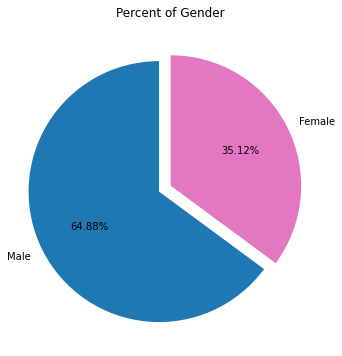

In [15]:
gender = heart_failure_df.sex.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(gender, labels = ["Male", "Female"], autopct = '%.2f%%', startangle = 90, colors = ['tab:blue', 'tab:pink'], explode=[0.1, 0],)
plt.title("Percent of Gender");

The dataset is imbalanced in that there are **89** more males than females; **1.83 times** more. This would be worth investigating further as to whether or not more males responded than females, or if heart failure is more predominant in males than it is in females.

- **64.88%** males
- **35.12%** females

In [16]:
#death rate distribution
heart_failure_copy.patient_outcome.value_counts()

Alive    203
Dead      96
Name: patient_outcome, dtype: int64

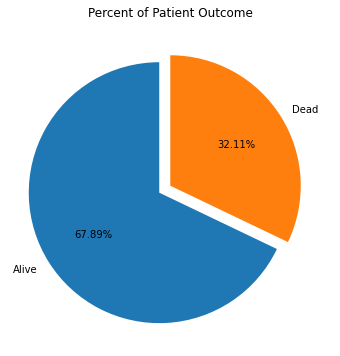

In [17]:
death = heart_failure_df.patient_outcome.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(death, labels = ["Alive", "Dead"], autopct = '%.2f%%', startangle = 90, colors = ['tab:blue', 'tab:orange'], explode=[0.1, 0],)
plt.title("Percent of Patient Outcome");

The ratio of patients who have died compared to those that were alive during the follow up period is promising: patients were alive more than **47.29%** compared to those that died.

- **32.11%** dead
- **67.89%** alive

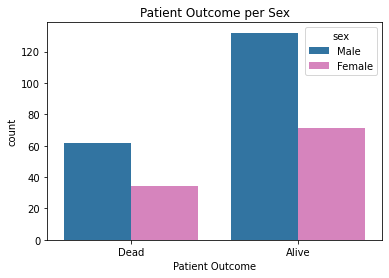

In [18]:
#death vs sex distribution
sns.countplot(x = "patient_outcome", data = heart_failure_copy, hue = "sex", palette = ['tab:blue', 'tab:pink'])
plt.xlabel('Patient Outcome')
plt.title('Patient Outcome per Sex')
plt.show()

The data is a bit imbalanced due to having almost twice as many men as women patients. More females were alive during the follow up period compared to males that died, but we cannot say for certain if this an entirely accurate representation of all patients with heart failure due to the imbalance of sex.

In [19]:
#number of males that died
male_dead = heart_failure_copy[(heart_failure_copy['sex'] == 'Male') & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_male_dead = len(male_dead)
print("Number of males that died:",count_male_dead)

Number of males that died: 62


In [20]:
#number of females that are alive
female_alive = heart_failure_copy[(heart_failure_copy['sex'] == 'Female') & (heart_failure_copy['patient_outcome'] == 'Alive')]
count_female_alive = len(female_alive)
print("Number of females that are alive:",count_female_alive)

Number of females that are alive: 71


- There are only **9** more females that were counted as alive compared to males that died during the follow up period.

In [21]:
#smoking distribution
heart_failure_copy.smoking.value_counts()

No     203
Yes     96
Name: smoking, dtype: int64

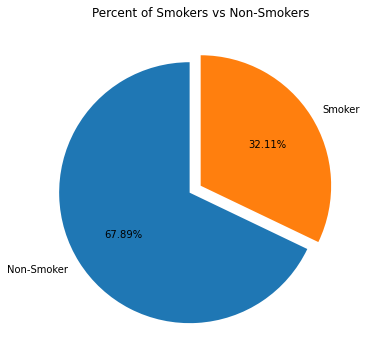

In [22]:
smoke = heart_failure_df.smoking.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(smoke, labels = ["Non-Smoker", "Smoker"], autopct = '%.2f%%', startangle = 90, colors = ['tab:blue', 'tab:orange'], explode=[0.1, 0],)
plt.title("Percent of Smokers vs Non-Smokers");

- Interesting find: the number of individuals that smoke is the exact same number of individuals that died!

The dataset has **2.11** times more smokers than non-smokers, yet there are significantly less deaths than one would expect from this statistic. This is another variable worth investigating further.

In [23]:
#number of smokers that died
smoker_dead = heart_failure_copy[(heart_failure_copy['smoking'] == 'Yes') & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_smoker_dead = len(smoker_dead)
print("Number of smokers that died:",count_smoker_dead)

Number of smokers that died: 30


In [24]:
#number of smokers alive
smoker_alive = heart_failure_copy[(heart_failure_copy['smoking'] == 'Yes') & (heart_failure_copy['patient_outcome'] == 'Alive')]
count_smoker_alive = len(smoker_alive)
print("Number of smokers that are alive:",count_smoker_alive)

Number of smokers that are alive: 66


It is interesting to see that, while the number of smokers is the exact same number of patients that died, not all smokers died during the collection of this data.

- **31.25%** of smokers died
- **68.75%** of smokers are alive

There were **45.45%** more smoking patients alive during the follow up period than smokers that died: 2.2 times more smokers alive than dead.

It would be safe to add a temporary conclusion that smoking did not have a primary effect on patient outcome due to heart failure in this dataset. However, further investigation into other variables included here, then cross-referencing them to smokers vs non-smokers would be helpful in finding trends on whether or not smoking can kill heart failure patients with underlying conditions.

In [25]:
#diabetic distribution
heart_failure_copy.diabetes.value_counts()

No     174
Yes    125
Name: diabetes, dtype: int64

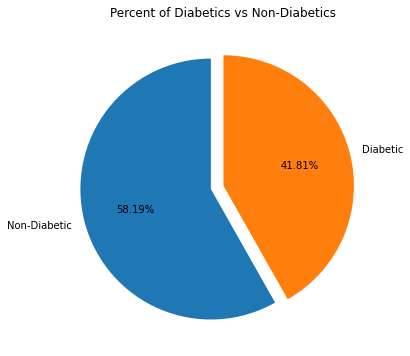

In [26]:
diabetic = heart_failure_df.diabetes.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(diabetic, labels = ["Non-Diabetic", "Diabetic"], autopct = '%.2f%%', startangle = 90, colors = ['tab:blue', 'tab:orange'], explode=[0.1, 0],)
plt.title("Percent of Diabetics vs Non-Diabetics");

There are **1.39 times** more non-diabetics compared to people diagnosed with diabetes.

- **58.19%** non-diabetics
- **41.81%** have diabetes

In [27]:
#anemia distribution
heart_failure_copy.anaemia.value_counts()

No     170
Yes    129
Name: anaemia, dtype: int64

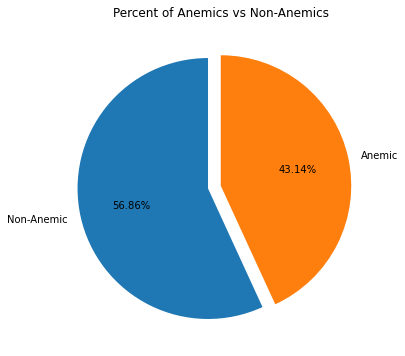

In [28]:
anemia = heart_failure_df.anaemia.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(anemia, labels = ["Non-Anemic", "Anemic"], autopct = '%.2f%%', startangle = 90, colors = ['tab:blue', 'tab:orange'], explode=[0.1, 0],)
plt.title("Percent of Anemics vs Non-Anemics");

There are **1.32 times** more people without anemia than those with anemia.

- **56.86%** do not have anemia
- **43.14%** have anemia

In [29]:
#high blood pressure distribution
heart_failure_copy.high_blood_pressure.value_counts()

No     194
Yes    105
Name: high_blood_pressure, dtype: int64

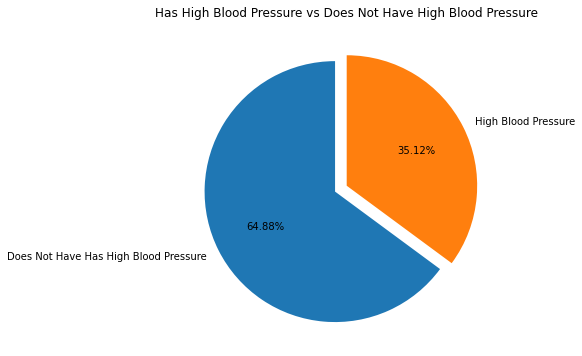

In [30]:
hbp = heart_failure_df.high_blood_pressure.value_counts()
plt.figure(figsize = (12, 6))
plt.pie(hbp, labels = ["Does Not Have Has High Blood Pressure", "High Blood Pressure"], autopct = '%.2f%%', startangle = 90, colors = ['tab:blue', 'tab:orange'], explode=[0.1, 0],)
plt.title("Has High Blood Pressure vs Does Not Have High Blood Pressure");

There are **1.85 times** more people that do not have high blood pressure compared to those that do.

- **64.88%** do not have high blood pressure
- **35.12%** do have high blood pressure

In [31]:
#age distribution
heart_failure_copy.age.value_counts()

60    35
50    27
65    26
70    25
45    19
55    17
75    11
58    10
53    10
63     8
42     7
40     7
72     7
80     7
85     6
52     5
68     5
62     5
49     4
61     4
59     4
73     4
51     4
64     3
46     3
69     3
82     3
90     3
66     2
78     2
54     2
77     2
57     2
44     2
67     2
95     2
48     2
43     1
86     1
81     1
79     1
41     1
94     1
87     1
47     1
56     1
Name: age, dtype: int64

In [32]:
# finding min & max age for histplot in next codeblock
min_age = min(heart_failure_copy.age)
max_age = max(heart_failure_copy.age)

print("The minimum age in this dataset is:",min_age)
print("The minimum age in this dataset is:",max_age)

The minimum age in this dataset is: 40
The minimum age in this dataset is: 95


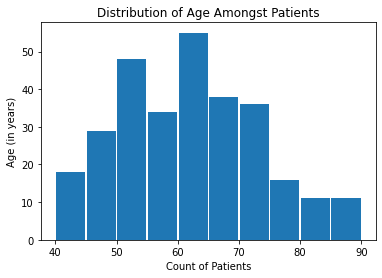

In [34]:
plt.hist(heart_failure_copy.age, bins = np.arange(40,95, 5), rwidth = 0.95, color = 'tab:blue')
plt.xlabel("Count of Patients")
plt.ylabel("Age (in years)")
plt.title("Distribution of Age Amongst Patients")
plt.show()

- The age range 60 - 65 has the highest number of patients in this dataset, followed by 50 - 55.

### Deep diving into the numerical columns (minus uniqueid and age)

In [35]:
# Describing to only columns with numerical data
heart_failure_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,299.0,149.000000,86.458082,0.0,74.5,149.0,223.5,298.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
age,299.0,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0


### Ejection Fraction (EF)

"Ejection fraction (EF) is a measure of how well the heart is pumping blood. It is a percentage that represents the amount of blood that is pumped out of the left ventricle of the heart with each contraction. The left ventricle is the chamber of the heart that pumps oxygenated blood to the rest of the body. The EF is calculated as the ratio of the volume of blood pumped out of the left ventricle (stroke volume) to the total volume of blood in the left ventricle at the end of diastole (the period of relaxation between contractions). A normal EF is generally considered to be between **55% and 70%**. An EF of **less than 40% is considered to be indicative of heart failure**, specifically systolic heart failure, in which the heart is not able to pump enough blood to meet the body's needs. However, an EF of less than 55% does not necessarily mean that a person has heart failure, it can also be caused by various factors such as hypertension, valvular disease, and others. **A high ejection fraction (EF) is generally considered to be above 70%**. In general, a high EF indicates that the heart is pumping blood efficiently and effectively, which is considered to be a good sign of heart health. However, high EF alone may not be a definitive indicator of heart health, and other factors such as blood pressure, cholesterol, and other lab test results should be considered. A high EF can be seen in certain medical conditions such as hypertension, hyperthyroidism, and anemia. Also, certain medications such as beta-blockers and ACE inhibitors can increase the EF. A high EF can also be seen in some cases of heart disease, such as hypertrophic cardiomyopathy, a condition in which the heart muscle becomes thickened, which can cause the heart to pump more forcefully and result in a higher EF." -ChatGPT

In [36]:
# Using Z-score to find outliers
z_scores = (heart_failure_copy['ejection_fraction'] - heart_failure_copy['ejection_fraction'].mean()) / heart_failure_copy['ejection_fraction'].std()

In [37]:
threshold = 3

outliers = heart_failure_copy[z_scores.abs() > threshold]

In [38]:
outliers

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
64,64,No,80,137,263358.03,582,No,1.18,No,No,45,Female,Alive,10 - 50


- Only one true outlier detected using the Z-score method; patient ID 64.

One outlier is not going to skew the data enough to make a difference, therefor I will not be dropping it at this time.

In [39]:
# Checking for patients that are below 40%, as this can be an indication of heart failure
low_ef = heart_failure_copy[heart_failure_copy.ejection_fraction < 40]
count_low_ef = len(low_ef)
print("Number of patients with low ejection fraction:",count_low_ef)

Number of patients with low ejection fraction: 182


- The results for patients with an EF of less than 40% is abnormally high: 182 patients out of 299 reported lower than normal EF levels. Out of 299 patients present in this dataset, **60.87% have low ejection fraction**.

In [40]:
# Filtering data to find all patients that have an EF < 40% and "Dead" under patient outcome
filtered_ef = heart_failure_copy[(heart_failure_copy['ejection_fraction'] < 40) & (heart_failure_copy['patient_outcome'] == 'Dead')]

In [41]:
count_filtered_ef = len(filtered_ef)
print("Number of patients with low ejection fraction that have died:",count_filtered_ef)

Number of patients with low ejection fraction that have died: 73


- Over the course of this dataset, 73 patients have died that also have an EF of less than 40%. Out of 182 patients that have a low EF, **40.11%** have died.
 
- If we look at the entire count of patients (299) **24.41%** of patients that have an EF of less than 40% have **died**.

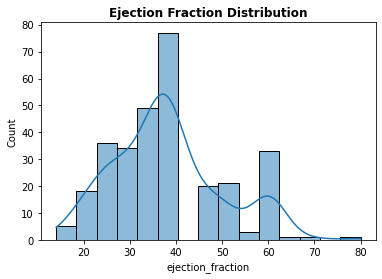

In [42]:
# Distribution of ejection fraction
sns.histplot(heart_failure_copy.ejection_fraction, kde=True, color='tab:blue')
plt.title("Ejection Fraction Distribution", fontweight='bold');

- Ejection fraction is slightly right skewed, which correlates to only finding one true outlier with the Z-score method.
- Ejection fraction is the most common abnormality among tests recorded in this dataset, with **60.87%** of patients having low EF.

### Serum Sodium

"Serum sodium is a laboratory test that measures the level of sodium in the blood. Sodium is an electrolyte that helps regulate the balance of fluids in and around cells, and is essential for normal cell function and nerve and muscle function. The normal range for serum sodium is generally considered to be between **135 and 145 milliequivalents per liter (mEq/L)**. Low levels of serum sodium, known as hyponatremia, can occur due to a number of causes such as kidney failure, liver disease, heart failure, certain medications, and drinking excessive amounts of water." -ChatGPT

In [43]:
# Using Z-score to find outliers
z_scores = (heart_failure_copy['serum_sodium'] - heart_failure_copy['serum_sodium'].mean()) / heart_failure_copy['serum_sodium'].std()

In [44]:
threshold = 3

outliers_ss = heart_failure_copy[z_scores.abs() > threshold]

In [45]:
outliers_ss

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
4,4,No,20,116,327000.00,160,Yes,2.7,Yes,No,65,Female,Dead,51 - 70
19,19,No,55,121,87000.00,582,Yes,1.9,Yes,No,48,Female,Dead,10 - 50
199,199,Yes,35,113,263358.03,1211,Yes,1.8,No,No,60,Male,Alive,51 - 70


- Using the Z-score method to find outliers, three have been deteced for Serum Sodium: patient ID's 4, 19, and 199. It is interesting to see that 2 out of these three patients were female, and both have died; while the only male outlier was still alive during the follow-up period.

These three outliers are not low enough to make a significant difference in this dataset, therefore I will be keeping them in at this time.

In [46]:
# Checking for patients that are below the lower end of the normal range indicated above (135 - 145)
low_ss = heart_failure_copy[heart_failure_copy.serum_sodium < 135]
count_low_ss = len(low_ss)
print("Number of patients with low serum_sodium:",count_low_ss)

Number of patients with low serum_sodium: 83


- The results for patients with a low serum sodium level is not as high as the results obtained for EF: 83 patients out of 299 have a serum sodium level lower than what is considered normal. This is **27.76%** of patients in this dataset.

In [47]:
# Checking for patients that are above the higher end of the normal range indicated above (135 - 145)
high_ss = heart_failure_copy[heart_failure_copy.serum_sodium > 145]
count_high_ss = len(high_ss)
print("Number of patients with high serum_sodium:",count_high_ss)

Number of patients with high serum_sodium: 2


_- Only two patients have slightly elevated serum sodium levels, and this could be due to a number of factors that are not included with the original dataset. This is too small of a group, and to ambigious, to explore any further._

In [48]:
# Filtering data to find all patients that have a serum sodium level below 135 and "Dead" under patient outcome
filtered_ss = heart_failure_copy[(heart_failure_copy['serum_sodium'] < 135) & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_filtered_ss = len(filtered_ss)
print("Number of patients with low serum sodium that have died:",count_filtered_ss)

Number of patients with low serum sodium that have died: 42


- Over the course of this dataset, 42 patients have died that also have a serum sodium level less than 135. Out of 83 patients that have low serum sodium, **50.60%** have died.
 
- If we look at the entire count of patients (299), only **14.05%** of patients that have a serum sodium level less than 135 have **died**.

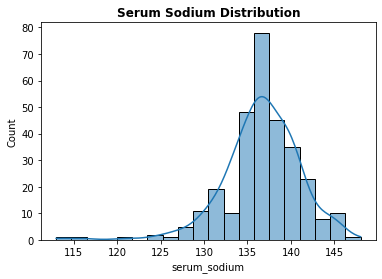

In [49]:
# Distribution of serum sodium
sns.histplot(heart_failure_copy.serum_sodium, kde=True, color='tab:blue')
plt.title("Serum Sodium Distribution", fontweight='bold');

- Serum Sodium is left skewed, as shown in the distribution above, and the true outliers are the three lowest values in the dataset.
- Serum Sodium is less common amongst heart failure patients as only **27.76** of patients present with adnormally low levels.

### Platelets

"Platelets, also known as thrombocytes, are small, colorless cell fragments that are present in the blood. They play a crucial role in the process of blood clotting, also known as coagulation, which helps to stop bleeding when a blood vessel is injured. When a blood vessel is damaged, platelets are the first cells to arrive at the site of injury. They stick to the wall of the damaged blood vessel and to each other, forming a clot that helps to plug the hole and stop the bleeding. This process is called primary hemostasis. Platelets also release chemical signals, called growth factors, that attract other cells to the site of injury to help repair the damaged blood vessel. Once the bleeding has stopped, the clot dissolves and the repair process is completed. The normal range for platelet count is typically between **150,000 and 450,000 platelets per microliter of blood**. Low platelet count, known as thrombocytopenia, can occur due to a variety of causes such as bone marrow disorders, viral infections, certain medications, and certain types of cancer. High platelet count, known as thrombocytosis, can occur due to various causes such as bone marrow disorders, certain types of cancer, and other medical conditions. Symptoms of thrombocytosis may include thrombotic events such as stroke or heart attack." -ChatGPT

In [50]:
# Using Z-score to find outliers
z_scores = (heart_failure_copy['platelets'] - heart_failure_copy['platelets'].mean()) / heart_failure_copy['platelets'].std()

In [51]:
threshold = 3

outliers_p = heart_failure_copy[z_scores.abs() > threshold]

In [52]:
outliers_p

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
105,105,Yes,30,138,621000.0,328,No,1.7,Yes,Yes,72,Female,Dead,71 - 80
109,109,Yes,35,142,850000.0,292,Yes,1.3,No,No,45,Male,Alive,10 - 50
296,296,No,60,138,742000.0,2060,Yes,0.8,No,No,45,Female,Alive,10 - 50


- Using the Z-score method to find outliers, three have been detected for Platelets: patient ID's 105, 109, and 296. Other than having an abnormally high platelet count (compared to the normal range mentioned above), there seems to be no significance to these patients. There are two females, and one male: one female has died during the follow-up period, but the other two were still alive.

These three outliers are high enough that they could potentially skew the descriptive statistics and outcomes of patients. However, I will not be going further with this variable at this time, therefor they will not be dropped.

In [55]:
# Checking for patients that are below the lower end of the normal range indicated above (150,000 - 450,000)
low_p = heart_failure_copy[heart_failure_copy.platelets < 150000]
count_low_p = len(low_p)
print("Number of patients with low platelets:",count_low_p)

Number of patients with low platelets: 27


- Only 27 patients, out of 299, have a lower than normal platelet count: **9.03%** of patients have a low platelet count.

In [56]:
# Checking for patients that are above the higher end of the normal range indicated above (150,000 - 450,000)
high_p = heart_failure_copy[heart_failure_copy.platelets > 450000]
count_high_p = len(high_p)
print("Number of patients with high platelet levels:",count_high_p)

Number of patients with high platelet levels: 13


- The count is even lower for patients that have a higher than normal platelet count: only 13 patients were detected, or **4.35%** of all patients in this dataset.

In [57]:
# Filtering data to find all patients that have a platelet count below 150,000 and "Dead" under patient outcome
filtered_p = heart_failure_copy[(heart_failure_copy['platelets'] < 150000) & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_filtered_p = len(filtered_p)
print("Number of patients with low platelets that have died:",count_filtered_p)

Number of patients with low platelets that have died: 11


- Over the course of this dataset, 11 patients have died that also have a platelet count of less than 150,000. Out of 27 patients that have a low platelet count, **40.74%** have died.
 
- If we look at the entire count of patients (299), only **3.68%** of patients that have a platelet count of less than 150,000 have **died**.

In [58]:
# Filtering data to find all patients that have a platelet count above 450,000 and "Dead" under patient outcome
filtered_p2 = heart_failure_copy[(heart_failure_copy['platelets'] > 450000) & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_filtered_p2 = len(filtered_p2)
print("Number of patients with high platelets that have died:",count_filtered_p2)

Number of patients with high platelets that have died: 5


- Over the course of this dataset, 5 patients have died that also have a platelet count of more than 450,000. Out of 13 patients that have a high platelet count, **38.46%** have died.
 
- If we look at the entire count of patients (299), only **1.67%** of patients that have a platelet count of more than 450,000 have **died**.

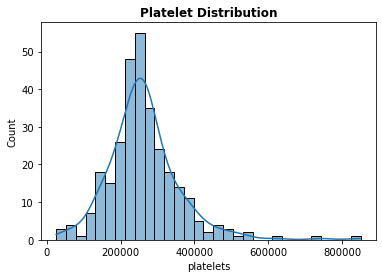

In [59]:
# Distribution of platelets
sns.histplot(heart_failure_copy.platelets, kde=True, color='tab:blue')
plt.title("Platelet Distribution", fontweight='bold');

- Platelet distribution is right skewed, just as ejection fraction is, and shows that the three true outliers are on the right side as they have extremely high platelet levels.
- Platelet count is less common amongst heart failure patients as only **13.38** of patients present with adnormally low, or high, levels.

### Creatinine Phosphokinase (CPK)

"Creatinine phosphokinase (CPK) is an enzyme found in many body tissues, including the heart, brain, and skeletal muscle. A normal CPK level in the blood is generally considered to be between **30 and 200 U/L (units per liter)** for adult men and women. Elevated levels of CPK can indicate muscle damage, such as from a muscle injury or certain medical conditions such as muscle disorders, heart attack, and some types of cancer. However, CPK level can also be elevated due to strenuous physical activity, alcohol consumption, certain medications, and other factors. The maximum CPK level that is considered safe in patients with heart failure can vary depending on the specific case. CPK levels that are significantly elevated above the normal range (**such as >1000 U/L**) can indicate a significant degree of muscle damage and may be indicative of a more severe form of heart failure." -ChatGPT

In [60]:
# Using Z-score to find outliers
z_scores = (heart_failure_copy['creatinine_phosphokinase'] - heart_failure_copy['creatinine_phosphokinase'].mean()) / heart_failure_copy['creatinine_phosphokinase'].std()

In [61]:
threshold = 3

outliers_cpk = heart_failure_copy[z_scores.abs() > threshold]

In [62]:
outliers_cpk

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
1,1,No,38,136,263358.03,7861,No,1.10,No,No,55,Male,Dead,51 - 70
52,52,No,62,146,263358.03,3964,Yes,6.80,No,No,60,Female,Dead,51 - 70
60,60,No,25,139,390000.00,7702,Yes,1.00,No,Yes,45,Male,Dead,10 - 50
72,72,Yes,35,132,243000.00,5882,No,1.00,No,No,85,Male,Dead,81 - 120
103,103,Yes,30,140,226000.00,5209,No,1.00,No,No,42,Male,Alive,10 - 50
134,134,Yes,35,137,231000.00,4540,No,1.18,No,No,81,Male,Alive,81 - 120
171,171,Yes,40,140,325000.00,3966,No,0.90,No,No,52,Male,Alive,51 - 70


- Using the Z-score method to find outliers, the data has returned 7 patient ID's: 1, 52, 60, 72, 103, 134, and 171. CPK has returned the highest number of outliers in the dataset (so far). The data across all columns seems to be evenly-distributed amongst the different variables, except for sex: there is only 1 female present in all 7 outliers.

CPK needs the most cleaning compared to how many outliers have been found, and how many patients have levels more than 5 times the high range of normal. However, for this analysis, in comparing levels to other risk factors, it is important to leave them in as CPK has the potential to show correlation / risk factor for patients with heart failure.

In [63]:
# Checking for patients that are below the lower end of the normal range indicated above (30 - 200)
low_cpk = heart_failure_copy[heart_failure_copy.creatinine_phosphokinase < 30]
count_low_cpk = len(low_cpk)
print("Number of patients with low creatinine phosphokinase (CPK):",count_low_cpk)

Number of patients with low creatinine phosphokinase (CPK): 1


_- Only one patient has a lower than normal CPK level, and this could be due to a number of factors that are not included with the original dataset. This is too small of a group, and to ambigious, to explore any further._

In [64]:
# Checking for patients that are above the higher end of the normal range indicated above (30 - 200)
high_cpk = heart_failure_copy[heart_failure_copy.creatinine_phosphokinase > 200]
count_high_cpk = len(high_cpk)
print("Number of patients with high creatinine phosphokinase (CPK):",count_high_cpk)

Number of patients with high creatinine phosphokinase (CPK): 170


- The results for patients with a CPK above 200 is abnormally high: 170 patients out of 299 reported higher than normal CPK levels. Out of 299 patients present in this dataset, **56.86%** have a high CPK level.

In [65]:
#Dive deeper to see how many patients have CPK levels above 1,000 (a significantly elevated level that may indicate severe heart failure)
extreme_cpk = heart_failure_copy[heart_failure_copy.creatinine_phosphokinase > 1000]
count_extreme_cpk = len(extreme_cpk)
print("Number of patients with extremely high creatinine phosphokinase (CPK):",count_extreme_cpk)

Number of patients with extremely high creatinine phosphokinase (CPK): 36


- Out of the initial 170 patients that have a CPK level above normal (200+), only 36 patients have a CPK level of 1,000+. This shows that **21.18%** of patients that have higher than normal CPK levels could potentially have severe heart failure.
- Of all 299 patients this dataset collected, **12.04%** of patients are in the severe heart failure category if we are only looking at their CPK level.

In [66]:
# Filtering data to find all patients that have a CPK above 200 and "Dead" under patient outcome
filtered_cpk = heart_failure_copy[(heart_failure_copy['creatinine_phosphokinase'] > 200) & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_filtered_cpk = len(filtered_cpk)
print("Number of patients with high creatinine phosphokinase (CPK) that have died:",count_filtered_cpk)

Number of patients with high creatinine phosphokinase (CPK) that have died: 56


- In only looking at the CPK levels above 200, there are 56 patients out of 170 with higher than normal CPK levels who have died: this is **32.94%** of all patients with elevated CPK levels.
- If we look at the entire count of patients (299), **18.73%** of patients that have a CPK level above 200 have **died** (this includes those with levels above 1,000, or considered extremely high).

In [67]:
#Dive deeper to see how many patients with CPK above 1,000 have died during the follow-up period
filtered_cpk2 = heart_failure_copy[(heart_failure_copy['creatinine_phosphokinase'] > 1000) & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_filtered_cpk2 = len(filtered_cpk2)
print("Number of patients with extremely high creatinine phosphokinase (CPK) that have died:",count_filtered_cpk2)

Number of patients with extremely high creatinine phosphokinase (CPK) that have died: 10


- Over the course of this dataset, 10 patients have died that also have a an extremely high CPK level (above 1,000). Out of the 56 patients that have a CPK level above 200 and died, **17.86%** had levels in this extreme category.

- Out of the 36 patients who have CPK levels above 1,000, **27.78%** have died, the rest were alive during the time this data was collected in the follow up period.
 
- If we look at the entire count of patients (299), only **3.34%** of patients that have an extremely high CPK level (>1,000) have **died**.

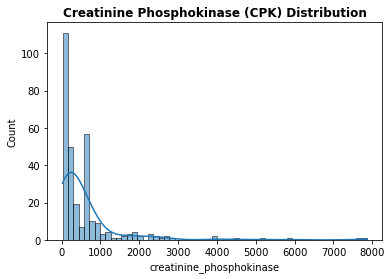

In [68]:
# Distribution of creatinine phosphokinase (or CPK)
sns.histplot(heart_failure_copy.creatinine_phosphokinase, kde=True, color='tab:blue')
plt.title("Creatinine Phosphokinase (CPK) Distribution", fontweight='bold');

- Creatinine Phosphokinase (CPK) is heavily right skewed, most likely due to a higher number of outliers than the other columns previously explored.
- CPK is the second highest abnormal factor amongst the patients in this dataset: **56.86%** of all patients have a higher than normal CPK level (>200), while **12.04%** are in the extremely high category (>1,000).

### Serum Creatinine

"Serum creatinine is a laboratory test that measures the level of creatinine in the blood. Creatinine is a waste product that is produced by the muscles and is filtered out of the blood by the kidneys. The level of creatinine in the blood can be an indicator of kidney function. The normal range for serum creatinine is generally considered to be between **0.5 and 1.2 milligrams per deciliter (mg/dL) for adult males and 0.4 to 1.1 mg/dL for adult females**. Elevated levels of creatinine can indicate decreased kidney function, a condition known as renal impairment or renal insufficiency. It can be caused by a variety of factors such as diabetes, hypertension, glomerulonephritis, pyelonephritis, and others. _Creatinine level can also be affected by muscle mass, as a person with more muscle will have a higher creatinine level, and a person with less muscle will have a lower creatinine level. Therefore, it's important to consider muscle mass when interpreting creatinine levels, especially in athletes or older adults who may have decreased muscle mass._" -ChatGPT

In [69]:
# Using Z-score to find outliers
z_scores = (heart_failure_copy['serum_creatinine'] - heart_failure_copy['serum_creatinine'].mean()) / heart_failure_copy['serum_creatinine'].std()

In [70]:
threshold = 3

outliers_sc = heart_failure_copy[z_scores.abs() > threshold]

In [71]:
outliers_sc

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
9,9,Yes,35,133,388000.00,123,No,9.4,Yes,Yes,80,Male,Dead,71 - 80
28,28,No,38,134,153000.00,60,No,5.8,Yes,No,58,Male,Dead,51 - 70
52,52,No,62,146,263358.03,3964,Yes,6.8,No,No,60,Female,Dead,51 - 70
131,131,No,45,131,250000.00,1082,Yes,6.1,Yes,No,60,Male,Alive,51 - 70
217,217,No,70,137,151000.00,427,No,9.0,Yes,Yes,54,Female,Dead,51 - 70
228,228,No,25,130,237000.00,56,No,5.0,No,No,65,Female,Alive,51 - 70


- Using the Z-score method to find outliers, the data has returned 6 patient ID's: 9, 28, 52, 131, 217, and 228. This variable has one less true outlier than CPK, making it the second highest. 
- The data across all columns seems to be evenly-distributed amongst the different variables.

Serum creatinine has the second highest number of outliers in this dataset, and the highest levels were almost 8 times higher than the high end of the normal range. For this analysis, much like CPK, in order to compare these egregious levels to other risk factors, they must be left in.

In [72]:
# Total number of patients with low serum creatinine levels
low_sc = heart_failure_copy[heart_failure_copy.serum_creatinine < 0.4]
count_low_sc = len(low_sc)
print("Number of patients with low serum creatinine:", count_low_sc)

Number of patients with low serum creatinine: 0


In [73]:
# Total number of patients with high serum creatinine levels
high_sc = heart_failure_copy[heart_failure_copy.serum_creatinine > 1.2]
count_high_sc = len(high_sc)
print("Number of patients with high serum creatinine:", count_high_sc)

Number of patients with high serum creatinine: 101


- I decided to use the lowest and highest level amongst both males and females as the total range to calculate the amount of patients with low and high levels. I will explore further into both males and females separately next.
- There are no patients with lower than normal Serum Creatinine.
- There are 101 total patients with higher than normal Serum Creatinine levels (> 1.2). Out of the 299 patients collected in this dataset, **33.78%** have higher than normal Serum Creatinine levels.

_NOTE: Since there were no patients in the first portion, extracting all patients with lower than normal Serum Creatinine levels, there is no need to code this portion._

In [74]:
# Checking for male patients that are above the higher end of the normal range (0.5 - 1.2)
high_male_sc = heart_failure_copy[(heart_failure_copy['serum_creatinine'] > 1.2) & (heart_failure_copy['sex'] == 'Male')]
count_high_male_sc = len(high_male_sc)
print("Number of male patients with high serum creatinine:",count_high_male_sc)

Number of male patients with high serum creatinine: 67


- There are 67 males with a Serum Creatinine level above normal (1.2). Out of the total patients collected with high levels, **66.34%** are male.
- Out of 299 patients present in this dataset, **22.41%** have a higher than normal Serum Creatinine level (and are male).

In [75]:
# Dive deeper and see how many males with high serum creatinine have died
male_sc_died = heart_failure_copy[(heart_failure_copy['serum_creatinine'] > 1.2) & (heart_failure_copy['sex'] == 'Male') & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_male_sc_died = len(male_sc_died)
print("Number of male patients with high serum creatinine that have died:",count_male_sc_died)

Number of male patients with high serum creatinine that have died: 32


- Out of all patients that have higher than normal Serum Creatinine, 32 patients, or **31.68%**, were males that died.

- Out of all males that recorded higher than normal Serum Creatinine, **47.76%** died.
 
- If we look at the entire count of patients (299), **10.70%** of male patients that have high levels of Serum Creatinine **died**.

_NOTE: Since there were no patients in the first portion, extracting all patients with lower than normal Serum Creatinine levels, there is no need to code this portion._

In [76]:
# Checking for female patients that are above the higher end of the normal range (0.5 - 1.2)
high_female_sc = heart_failure_copy[(heart_failure_copy['serum_creatinine'] > 1.1) & (heart_failure_copy['sex'] == 'Female')]
count_high_female_sc = len(high_female_sc)
print("Number of female patients with high serum creatinine:", count_high_female_sc)

Number of female patients with high serum creatinine: 47


- There are 47 females with a Serum Creatinine level above normal. Out of the total patients collected prior, **33.66%** are female.
- Out of 299 patients present in this dataset, **15.72%** have a higher than normal Serum Creatinine level (and are female).

In [77]:
# Dive deeper and see how many females with high Serum Creatinine have died
female_sc_died = heart_failure_copy[(heart_failure_copy['serum_creatinine'] > 1.1) & (heart_failure_copy['sex'] == 'Female') & (heart_failure_copy['patient_outcome'] == 'Dead')]
count_female_sc_died = len(female_sc_died)
print("Number of female patients with high serum creatinine that died:", count_female_sc_died)

Number of female patients with high serum creatinine that died: 24


- Out of all patients that have higher than normal Serum Creatinine, 24 patients, or **23.76%**, were females that died.

- Out of all females that recorded higher than normal Serum Creatinine, **51.06%** died.
 
- If we look at the entire count of patients (299), **8.03%** of female patients that have high levels of Serum Creatinine **died**.

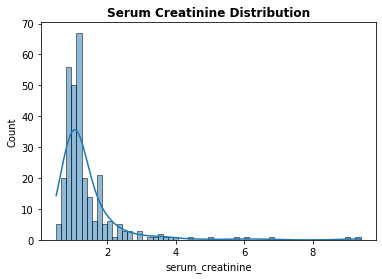

In [78]:
# Distribution of Serum Creatinine
sns.histplot(heart_failure_copy.serum_creatinine, kde=True, color='tab:blue')
plt.title("Serum Creatinine Distribution", fontweight='bold');

- Serum Creatinine is heavily right skewed, much like CPK is, most likely because it has the second highest amount of outliers.
- Serum Creatinine is another abnormal factor amongst the patients in this dataset: **33.78%** of all patients have a higher than normal Serum Creatinine level. Breaking this down in to each sex, males made up **66.34%** and females **33.66%** of the 101 patients recorded with higher than normal levels.
- Taking it further, looking at all patients that have a higher than normal Serium Creatinine level, **31.68%** that died were male, while only **21.78%** were female.

### During my tableau analysis, I found that the amount of non-smoking females in the 51-70 age group that died was higher than that of the same sex and age group, but were labeled as smokers. There was only 1 female smoker that died in the age group, compare to 17 non-smokers that died (same age and sex). Looking further into this visual, this was the only instance that the amount of female deaths were higher than male deaths (across all age groups, sex, and smoker vs non-smoker).
### - There were _17 female_, non-smoking deaths in the 51-70 age group.
### - While there were _13 male_ deaths within the same parameters.

### I will be exploring this finding to see if there is a correlation between other risk factors and the increase in female, non-smoking deaths in the 51-70 age group.

In [79]:
#filtering for female, age 51-70, non-smokers - regardless of outcome
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No")]
count_filter_fm = len(filter_fm)
print("Number of non-smoking, females, age 51-70 (regardless of outcome):",count_filter_fm)

Number of non-smoking, females, age 51-70 (regardless of outcome): 60


- There are **60 females** who do not smoke, between 51 and 70 years old.

In [80]:
#filtering down further to only include patients that died
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead")]
count_filter_fm = len(filter_fm)
print("Number of non-smoking, females, age 51-70 that have died:",count_filter_fm)

Number of non-smoking, females, age 51-70 that have died: 17


- Out of the 60 females from above, 17 have died: **28.33%** of this group (certain variables) have died during the follow up.

In [81]:
#how many of the 17 females that died have abnormal ejection fraction?
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead") & (heart_failure_copy["ejection_fraction"] < 40)]
count_filter_fm = len(filter_fm)
print("How many females that have died have abnormal ejection fraction?", count_filter_fm)

How many females that have died have abnormal ejection fraction? 11


- There are 11 patients that had lower than 40% EF levels: **64.71%** of non-smoking females, age 51-70 have died during follow-up.

In [82]:
#how many of the 17 females that died have abnormal serum sodium?
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead") & (heart_failure_copy["serum_sodium"] < 135)]
count_filter_fm = len(filter_fm)
print("How many females that have died have abnormal serum sodium?", count_filter_fm)

How many females that have died have abnormal serum sodium? 4


- There are 4 patients that had lower than 135 Serum Sodium levels: **23.53%** of non-smoking females, age 51-70 have died during follow-up.

In [83]:
#how many of the 17 females that died have abnormal platelet count?
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead") & (heart_failure_copy["platelets"] < 150000)]
count_filter_fm = len(filter_fm)
print("How many females that have died have an abnormal platelet level?", count_filter_fm)

How many females that have died have an abnormal platelet level? 1


- There is only 1 patient that had lower than 150,000 platelet levels: **5.88%** of non-smoking females, age 51-70 have died during follow-up. 

Note: there are no patients in this filtered dataset with higher than 450,000 platelet count.

In [84]:
#how many of the 17 females that died have abnormal creatinine phosphokinase (CPK)?
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead") & (heart_failure_copy["creatinine_phosphokinase"] > 200)]
count_filter_fm = len(filter_fm)
print("How many females that have died have abnormal creatinine phosphokinase (CPK)?", count_filter_fm)

How many females that have died have abnormal creatinine phosphokinase (CPK)? 6


In [85]:
#how many of the 17 females that died have extremely abnormal creatinine phosphokinase (CPK)?
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead") & (heart_failure_copy["creatinine_phosphokinase"] > 1000)]
count_filter_fm = len(filter_fm)
print("How many females that have died have extremely abnormal creatinine phosphokinase (CPK)?", count_filter_fm)

How many females that have died have extremely abnormal creatinine phosphokinase (CPK)? 2


- There are 6 patients that had higher than 200 CPKlevels: **35.29%** of non-smoking females, age 51-70 have died during follow-up. 
- However, there are only 2 patients within the high CPK group that have levels over 1,000: **11.76%** of non-smoking females, age 51-70 have died during follow-up with extremely high levels.

In [86]:
#how many of the 17 females that died have abnormal serum creatinine?
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No") & (heart_failure_copy["patient_outcome"] == "Dead") & (heart_failure_copy["serum_creatinine"] > 1.1)]
count_filter_fm = len(filter_fm)
print("How many females that have died have abnormal serum creatinine?", count_filter_fm)

How many females that have died have abnormal serum creatinine? 12


- There are 12 patients that had higher than 1.1 serum creatinine levels: **70.59%** of non-smoking females, age 51-70 have died during follow-up.

In [87]:
#create new df from non-smoking females, age 51-70 for plotting purposes
filter_fm = heart_failure_copy[(heart_failure_copy["sex"] == "Female") & (heart_failure_copy["age"] > 50) & (heart_failure_copy["age"] <= 70) & (heart_failure_copy["smoking"] == "No")]

nsf_df = pd.DataFrame(filter_fm)

nsf_df

,uniqueID,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anaemia,high_blood_pressure,age,sex,patient_outcome,age_group
4,4,No,20,116,327000.00,160,Yes,2.70,Yes,No,65,Female,Dead,51 - 70
8,8,No,65,138,263358.03,157,No,1.50,No,No,65,Female,Dead,51 - 70
18,18,No,25,140,237000.00,125,No,1.00,Yes,Yes,70,Female,Dead,51 - 70
20,20,No,25,137,276000.00,52,No,1.30,Yes,Yes,65,Female,Alive,51 - 70
21,21,No,30,136,297000.00,128,Yes,1.60,Yes,Yes,65,Female,Dead,51 - 70
39,39,No,38,142,329000.00,235,Yes,3.00,No,No,60,Female,Dead,51 - 70
44,44,No,60,142,194000.00,588,Yes,1.10,Yes,No,60,Female,Dead,51 - 70
49,49,No,30,140,395000.00,129,No,1.00,Yes,No,57,Female,Dead,51 - 70
51,51,No,20,139,418000.00,91,No,1.40,Yes,Yes,53,Female,Dead,51 - 70
52,52,No,62,146,263358.03,3964,Yes,6.80,No,No,60,Female,Dead,51 - 70


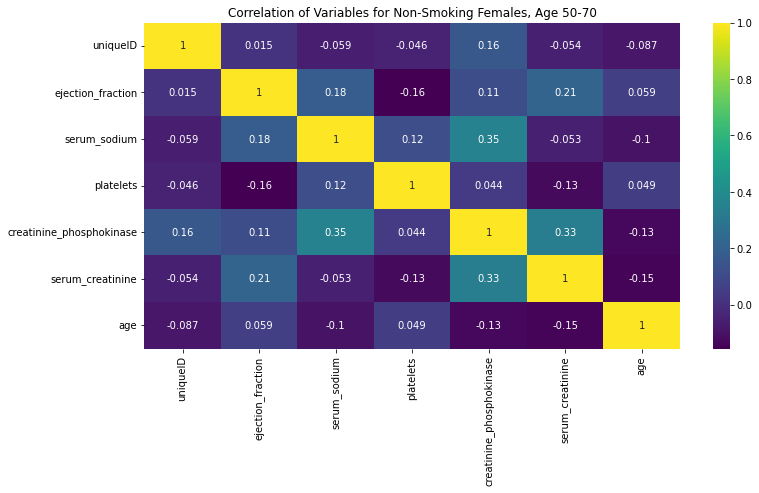

In [88]:
# calculate the correlation matrix
corr_matrix = nsf_df.corr()

# create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

# Add a title to the heatmap
plt.title("Correlation of Variables for Non-Smoking Females, Age 50-70")

# make the heatmap bigger
plt.gcf().set_size_inches(12, 6)

# show the plot
plt.show()

NOTE: It is important to remember that correlation _does not_ equal causation, and more testing is needed for any variables that show a positive, or negative, correlation in the heatmap above.

1) Variables closest to 1.0 (positive correlation):
- **serum sodium & CPK** = 0.35
- **CPK & serum creatinine** = 0.33
- **ejection fraction & serum creatinine** = 0.21

2) Variables closest to -1.0 (negative correlation):
- **ejection fraction & platelets** = -0.16

In [89]:
#Is there any indication that abnormal serum sodium and high CPK levels can be fatal for females age 51-70?
fm_ss_cpk = nsf_df[['age', 'patient_outcome', 'serum_sodium', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'platelets']]

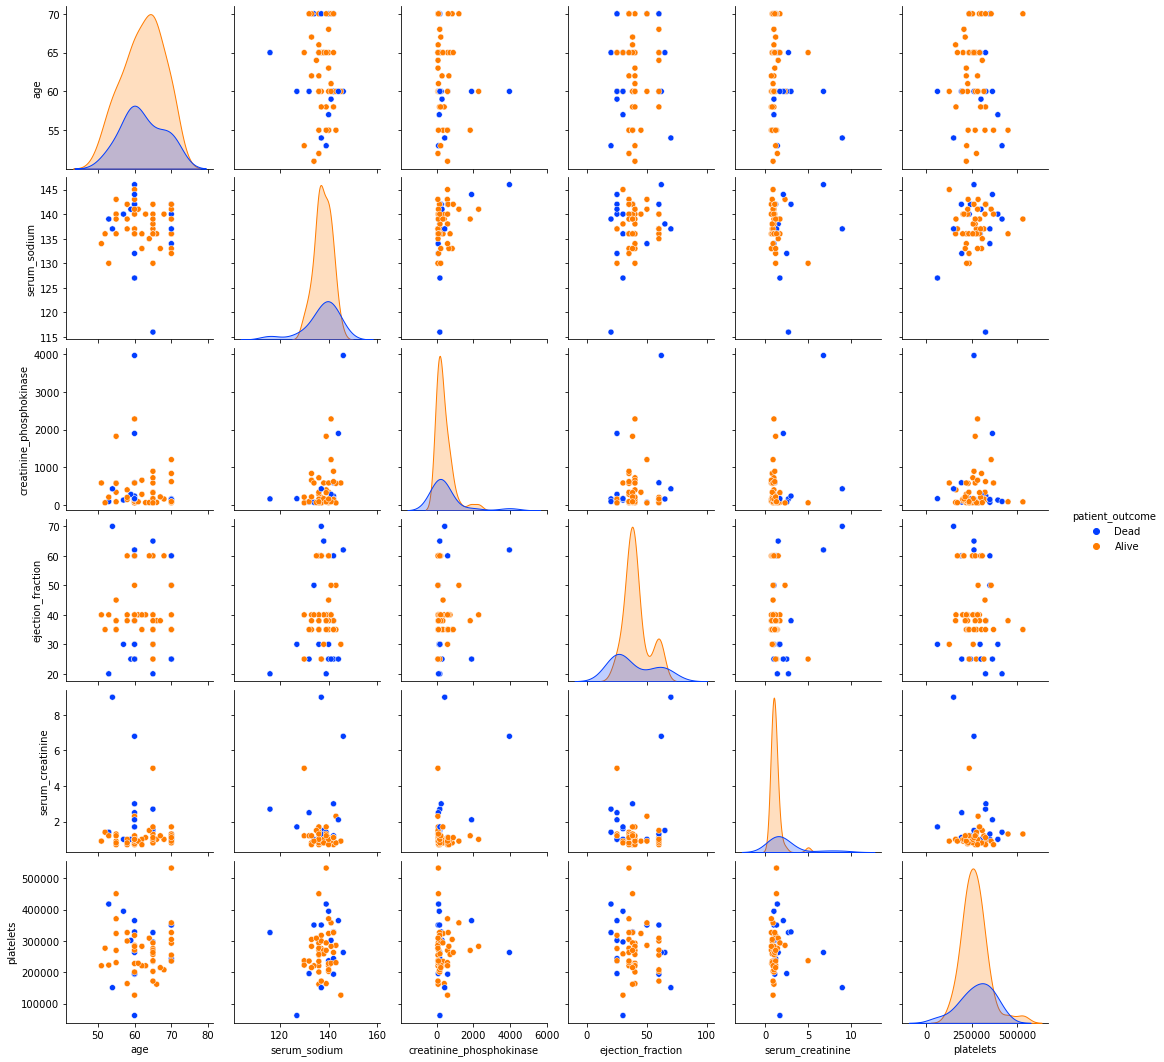

In [90]:
sns.pairplot(fm_ss_cpk, hue = 'patient_outcome', palette = 'bright');

- Pairplot is the best function here to visualize and understand the relationships between serium sodium, CPK, EF, serum creatinine, and platelets. These plots strengthen the correlation that is seen in the heatmap above for serum sodium and CPK: it is the only scatterplot that is showing a noticable curve between dead and alive patients as both levels increase.

### Side Exploration of Diabetes, Anemia, and High Blood Pressure in non-smoking females, age 51-70:

**1 - Diabetes Diagnosis**

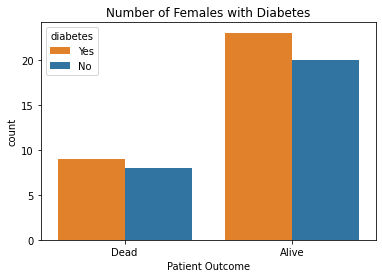

In [91]:
#count of non-smoking, 51-70 females with diabetes
sns.countplot(x = nsf_df.patient_outcome, hue = nsf_df.diabetes, palette = ['tab:orange', 'tab:blue'])
plt.xlabel('Patient Outcome')
plt.title('Number of Females with Diabetes');

In [92]:
#number of females in new df with diabetes that have died
fd_dead = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead")]
count_fd_dead = len(fd_dead)
print("How many non-smoking females with diabetes have died?",count_fd_dead)

How many non-smoking females with diabetes have died? 9


In [93]:
#number of females in new df with diabetes that are alive
fd_alive = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Alive")]
count_fd_alive = len(fd_alive)
print("How many non-smoking females with diabetes are alive?",count_fd_alive)

How many non-smoking females with diabetes are alive? 23


In [94]:
#number of females in new df without diabetes that have died
fnd_dead = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["diabetes"] == "No") & (nsf_df["patient_outcome"] == "Dead")]
count_fnd_dead = len(fnd_dead)
print("How many non-smoking females without diabetes have died?",count_fnd_dead)

How many non-smoking females without diabetes have died? 8


In [95]:
#number of females in new df without diabetes that are alive
fnd_alive = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["diabetes"] == "No") & (nsf_df["patient_outcome"] == "Alive")]
count_fnd_alive = len(fnd_alive)
print("How many non-smoking females without diabetes are alive?",count_fnd_alive)

How many non-smoking females without diabetes are alive? 20


There are more females in this age group that have been diagnosed with diabetes that were alive during the follow up portion of this data collection. This could potentially indicate that most females were managing their diabetes and keeping their levels within a controllable range, thus decreasing complications for heart failure and/or death.
- There are **9** females that were diagnosed with diabetes that died, and **23** females that are alive.
- There are **8** females that were not diagnosed with diabetes that died, and **20** females that are alive.

In [96]:
fef = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40)]
count_fef = len(fef)
print(count_fef,"out of 9 females also had low ejection fraction.")
print(round((6/9)*100),"% of females died.")

6 out of 9 females also had low ejection fraction.
67 % of females died.


In [97]:
fss = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["serum_sodium"] < 135)]
count_fss = len(fss)
print(count_fss,"out of 9 females also had low serum sodium.")
print(round((3/9)*100),"% of females died.")

3 out of 9 females also had low serum sodium.
33 % of females died.


In [98]:
fp = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["platelets"] < 150000)]
count_fp = len(fp)
print(count_fp,"out of 9 females also had low platelets.")
print(round((0/9)*100),"% of females died.")

fp2 = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["platelets"] > 450000)]
count_fp2 = len(fp2)
print(count_fp2,"out of 9 females also had high platelets.")
print(round((0/9)*100),"% of females died.")

0 out of 9 females also had low platelets.
0 % of females died.
0 out of 9 females also had high platelets.
0 % of females died.


In [99]:
fcpk = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["creatinine_phosphokinase"] > 200)]
count_fcpk = len(fcpk)
print(count_fcpk,"out of 9 females also had high creatinine_phosphokinase.")
print(round((5/9)*100),"% of females died.")

fcpk2 = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["creatinine_phosphokinase"] > 1000)]
count_fcpk2 = len(fcpk2)
print(count_fcpk2,"out of 9 females also had extremely high creatinine_phosphokinase.")
print(round((2/9)*100),"% of females died.")

5 out of 9 females also had high creatinine_phosphokinase.
56 % of females died.
2 out of 9 females also had extremely high creatinine_phosphokinase.
22 % of females died.


In [100]:
fsc = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["serum_creatinine"] > 1.1)]
count_fsc = len(fsc)
print(count_fsc,"out of 9 females also had high serum creatinine.")
print(round((6/9)*100),"% of females died.")

6 out of 9 females also had high serum creatinine.
67 % of females died.


The most noticeable correlation between non-smoking females, age 51-70, that were diagnosed with diabetes came from **low ejection fraction**, **high creatinine phosphokinase**, and **high serum creatinine**: all three variables were present in over half of the females that have died.
- Low ejection fraction was present in **67%** of patients.
- High creatine phosphokinase was present in **56%** of patients.
- High serum creatinine was present in **67%** of patients.

It would be interesting to see how many females had all three present:

In [101]:
female_combo = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40) & (nsf_df["creatinine_phosphokinase"] > 200) & (nsf_df["serum_creatinine"] > 1.1)]
count_f_combo = len(female_combo)
print("Only",count_f_combo,"out of 17 female patients that died, and diagnosed with diabetes had all three abnormal levels.")

Only 2 out of 17 female patients that died, and diagnosed with diabetes had all three abnormal levels.


- **11.76%** of females that died were diagnosed with diabetes and had all three abnormal levels.

**2 - High Blood Pressure Diagnosis**

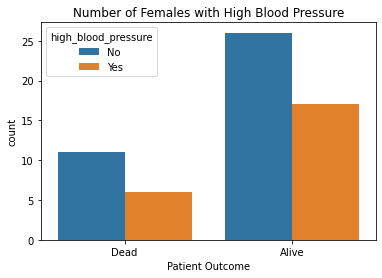

In [102]:
#count of females with high bp from new df
sns.countplot(x = nsf_df.patient_outcome, hue = nsf_df.high_blood_pressure, palette = ['tab:blue', 'tab:orange'])
plt.xlabel('Patient Outcome')
plt.title('Number of Females with High Blood Pressure');

In [103]:
#number of females in new df with high blood pressure that have died
fhbp_dead = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead")]
count_fhbp_dead = len(fhbp_dead)
print("How many non-smoking females with high blood pressure have died?",count_fhbp_dead)

How many non-smoking females with high blood pressure have died? 6


In [104]:
#number of females in new df with high blood pressure that are alive
fhbp_alive = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Alive")]
count_fhbp_alive = len(fhbp_alive)
print("How many non-smoking females with high blood pressure are alive?",count_fhbp_alive)

How many non-smoking females with high blood pressure are alive? 17


In [105]:
#number of females in new df without high blood pressure that have died
fnhbp_dead = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["high_blood_pressure"] == "No") & (nsf_df["patient_outcome"] == "Dead")]
count_fnhbp_dead = len(fnhbp_dead)
print("How many non-smoking females without high blood pressure have died?",count_fnhbp_dead)

How many non-smoking females without high blood pressure have died? 11


In [106]:
#number of females in new df without high blood pressure that are alive
fnhbp_alive = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["high_blood_pressure"] == "No") & (nsf_df["patient_outcome"] == "Alive")]
count_fnhbp_alive = len(fnhbp_alive)
print("How many non-smoking females without high blood pressure are alive?",count_fnhbp_alive)

How many non-smoking females without high blood pressure are alive? 26


There are more females without high blood pressure that have died than those diagnosed with high blood pressure: however, the same is to be said about the females that were still alive during the follow up. High blood pressure is the only variable (out of these last three) that more patients died without having high blood pressure than those that did have high blood pressure. This is an interesting find and needs to be further investigated over a long time-span.
- There are **6** females that were diagnosed with high blood pressure that died, and **17** females that are alive.
- There are **11** females that were not diagnosed with high blood pressure that died, and **26** females that are alive.

In [107]:
fef = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40)]
count_fef = len(fef)
print(count_fef,"out of 6 females also had low ejection fraction.")
print(round((4/6)*100),"% of females died.")

4 out of 6 females also had low ejection fraction.
67 % of females died.


In [108]:
fss = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["serum_sodium"] < 135)]
count_fss = len(fss)
print(count_fss,"out of 6 females also had low serum sodium.")
print(round((1/6)*100),"% of females died.")

1 out of 6 females also had low serum sodium.
17 % of females died.


In [109]:
fp = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["platelets"] < 150000)]
count_fp = len(fp)
print(count_fp,"out of 6 females also had low platelets.")
print(round((0/6)*100),"% of females died.")

fp2 = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["platelets"] > 450000)]
count_fp2 = len(fp2)
print(count_fp2,"out of 6 females also had high platelets.")
print(round((0/6)*100),"% of females died.")

0 out of 6 females also had low platelets.
0 % of females died.
0 out of 6 females also had high platelets.
0 % of females died.


In [110]:
fcpk = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["creatinine_phosphokinase"] > 200)]
count_fcpk = len(fcpk)
print(count_fcpk,"out of 6 females also had high creatinine_phosphokinase.")
print(round((2/6)*100),"% of females died.")

fcpk2 = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["creatinine_phosphokinase"] > 1000)]
count_fcpk2 = len(fcpk2)
print(count_fcpk2,"out of 6 females also had extremely high creatinine_phosphokinase.")
print(round((0/6)*100),"% of females died.")

2 out of 6 females also had high creatinine_phosphokinase.
33 % of females died.
0 out of 6 females also had extremely high creatinine_phosphokinase.
0 % of females died.


In [111]:
fsc = nsf_df[(nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["serum_creatinine"] > 1.1)]
count_fsc = len(fsc)
print(count_fsc,"out of 6 females also had high serum creatinine.")
print(round((3/6)*100),"% of females died.")

3 out of 6 females also had high serum creatinine.
50 % of females died.


The most noticeable correlation between non-smoking females, age 51-70, that were diagnosed with diabetes came from **low ejection fraction** and **high serum creatinine**: both variables were present in over half of the females that have died.
- Low ejection fraction was present in **67%** of patients (same percentage as diabetes).
- High serum creatinine was present in **50%** of patients.

It would be interesting to see how many females had both present:

In [112]:
dhbp_ef = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40) & (nsf_df["serum_creatinine"] > 1.1)]
count_dhpb_ef = len(dhbp_ef)
print("There are only",count_dhpb_ef,"out of 17 females that died that have both diabetes and high blood pressure, and also have low ejection fraction and high serum creatinine.")

There are only 1 out of 17 females that died that have both diabetes and high blood pressure, and also have low ejection fraction and high serum creatinine.


- **5.88%** of females that died were diagnosed with high blood pressure and had both abnormal levels.

**3 - Anemia Diagnosis**

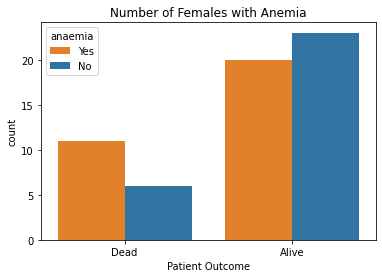

In [113]:
#count of females with anemia from new df
sns.countplot(x = nsf_df.patient_outcome, hue = nsf_df.anaemia, palette = ['tab:orange', 'tab:blue'])
plt.xlabel('Patient Outcome')
plt.title('Number of Females with Anemia');

In [114]:
#number of females in new df with anemia that have died
fa_dead = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead")]
count_fa_dead = len(fa_dead)
print("How many non-smoking females with anemia have died?",count_fa_dead)

How many non-smoking females with anemia have died? 11


In [115]:
#number of females in new df with anemia that are alive
fa_alive = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Alive")]
count_fa_alive = len(fa_alive)
print("How many non-smoking females with anemia are alive?",count_fa_alive)

How many non-smoking females with anemia are alive? 20


In [116]:
#number of females in new df without anemia that have died
fna_dead = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["anaemia"] == "No") & (nsf_df["patient_outcome"] == "Dead")]
count_fna_dead = len(fna_dead)
print("How many non-smoking females without anemia have died?",count_fna_dead)

How many non-smoking females without anemia have died? 6


In [117]:
#number of females in new df without anemia that are alive
fna_alive = nsf_df[(nsf_df["sex"] == "Female") & (nsf_df["anaemia"] == "No") & (nsf_df["patient_outcome"] == "Alive")]
count_fna_alive = len(fna_alive)
print("How many non-smoking females without anemia are alive?",count_fna_alive)

How many non-smoking females without anemia are alive? 23


There are almost double the amount of females that have been diagnosed with anemia that were alive during the follow up period than there were those that died. The ratio climbs higher in females that were not diagnosed with anemia as alive females were present **3.83** times more than those that died.
- There are **11** females that were diagnosed with anemia that died, and **20** females that were alive.
- There are **6** females that were not diagnosed with anemia that died, and **23** females that were alive.

In [118]:
fef = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40)]
count_fef = len(fef)
print(count_fef,"out of 11 females also had low ejection fraction.")
print(round((7/11)*100),"% of females died.")

7 out of 11 females also had low ejection fraction.
64 % of females died.


In [119]:
fss = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["serum_sodium"] < 135)]
count_fss = len(fss)
print(count_fss,"out of 11 females also had low serum sodium.")
print(round((3/11)*100),"% of females died.")

3 out of 11 females also had low serum sodium.
27 % of females died.


In [120]:
fp = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["platelets"] < 150000)]
count_fp = len(fp)
print(count_fp,"out of 11 females also had low platelets.")
print(round((0/11)*100),"% of females died.")

fp2 = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["platelets"] > 450000)]
count_fp2 = len(fp2)
print(count_fp2,"out of 11 females also had high platelets.")
print(round((0/11)*100),"% of females died.")

0 out of 11 females also had low platelets.
0 % of females died.
0 out of 11 females also had high platelets.
0 % of females died.


In [121]:
fcpk = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["creatinine_phosphokinase"] > 200)]
count_fcpk = len(fcpk)
print(count_fcpk,"out of 11 females also had high creatinine_phosphokinase.")
print(round((3/11)*100),"% of females died.")

fcpk2 = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["creatinine_phosphokinase"] > 1000)]
count_fcpk2 = len(fcpk2)
print(count_fcpk2,"out of 11 females also had extremely high creatinine_phosphokinase.")
print(round((0/11)*100),"% of females died.")

3 out of 11 females also had high creatinine_phosphokinase.
27 % of females died.
0 out of 11 females also had extremely high creatinine_phosphokinase.
0 % of females died.


In [122]:
fsc = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["serum_creatinine"] > 1.1)]
count_fsc = len(fsc)
print(count_fsc,"out of 11 females also had high serum creatinine.")
print(round((6/11)*100),"% of females died.")

6 out of 11 females also had high serum creatinine.
55 % of females died.


The most noticeable correlation between non-smoking females, age 51-70, that were diagnosed with anemia came from **low ejection fraction** and **high serum creatinine**: both variables were present in over half of the females that have died.
- Low ejection fraction was present in **64%** of patients.
- High serum creatinine was present in **55%** of patients.

It would be interesting to see how many females had both present:

In [123]:
female_combo = nsf_df[(nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40) & (nsf_df["serum_creatinine"] > 1.1)]
count_f_combo = len(female_combo)
print("Only",count_f_combo,"out of 17 female patients with anemia that died had both abnormal levels.")

Only 4 out of 17 female patients with anemia that died had both abnormal levels.


- **23.53%** of females that died were diagnosed with anemia and had both abnormal levels.

It would be interesting to see, however, if there is a correlation between a patient having diabetes, high blood pressure, anemia and low ejection fraction:

In [124]:
dhbpa_ef = nsf_df[(nsf_df["diabetes"] == "Yes") & (nsf_df["high_blood_pressure"] == "Yes") & (nsf_df["anaemia"] == "Yes") & (nsf_df["patient_outcome"] == "Dead") & (nsf_df["ejection_fraction"] < 40)]
count_dhpba_ef = len(dhbpa_ef)
print("There are only",count_dhpba_ef,"out of 17 females that died that have diabetes, high blood pressure, anemia and also have low ejection fraction.")

There are only 2 out of 17 females that died that have diabetes, high blood pressure, anemia and also have low ejection fraction.


- **11.76%** of females with diabetes, high blood pressure, and anemia also had low ejection fraction, and died.

## Conclusion: Written Analysis

**1. Analysis Questions**

A) **Basic Statistics**
- There are no null (or NaN) values present in the original and cleaned dataset. I ran df.describe() twice in this project: once before I changed all Boolean columns to strings, and then once after I funneled down to only include the numerical columns. The second descriptive statistics table did include the uniqueid and age columns as I wanted to leave them as integers for plotting later on. None of the statistics changed from the first to the second analysis, I only wanted to narrow it down for easier evaluation. Creatinine Phosphokinase (CPK) and Serum Creatinine were the only two columns whose range was larger than the rest:
	- CPK range = 7,838
	- Serum Creatinine range = 8.9
- All data values were int, float, or string, and favorable for using in my exploratory analysis. I only changed the age datatype to only use full ages, not decimals.

B) **Outliers Detection**
- I decided to use the Z-score method to detect any outliers as I felt that this method would be the most accurate for this dataset.
- Ejection fraction only contained one outlier that was slightly higher than the rest. 
- Serum sodium contained three outliers that were moderately lower than the mean; however, being that the lower numbers can be a sign of heart failure, it would be detrimental to the research to take any of this information out.
- Platelets contained three outliers as well that were moderately higher above the mean.
- Creatinine phosphokinase (CPK) contained the highest number of outliers with seven patients having extremely high levels (compared to the mean). However, these extreme abnormal levels are a major risk-factor for heart failure, so they were left in for a more accurate representation of the data.
- Serum creatinine came in as the second highest to contain outliers with six patients having extremely high levels as well (compared to the mean). Again, just like for CPK and ejection fraction, being that this dataset contains lab levels for healthcare purposes, and these abnormal levels are an accurate indication for heart failure, they were left in.
- Since this dataset only contains 299 patients, and there are roughly 6.2 million individuals in the United States of America that have been diagnosed with heart failure, this data has a slighter larger margin of error ( than most (CDC, 2023).
- The margin of error (MOE), with a 95% confidence interval, is roughly 8.78.

**2. Data Cleaning**

- I ended up exporting all four csv files from Masterschool’s DataCamp workspace, importing into my personal SQL to practice the questions for the SQL portion of this project, and then joined all four datasets into one master csv. I then decided to upload my master csv file so that if other students changed anything in the original four files it would not change anything in my duplicated workspace.
- I renamed DEATH_EVENT to patient_outcome, and then changed the Boolean variables to “Dead” and “Alive” for a more readable dataset.
- I decided to drop the time column from my dataset as I did not believe it had any bearing on the rest of the data.
- I changed the age columns’ datatype from float to int, so as to only include whole numbers for better grouping when using this number in the cross-correlation analysis section.
- I changed all Boolean columns (there were 6 in the heart failure dataset) to reflect Yes/No, Female/Male, and Alive/Dead so that my visuals would be more appealing and easier to read. I did not want to have to keep repeating a legend with each Boolean column used.
- Everything else was left alone as this dataset did not contain many patients to pull from.

**3. Distribution Analysis**

- This dataset is slightly imbalanced as there were 1.83 times more males than females recorded as patients. Out of the 299 patients collected, 64.88% (194) were males and 35.12% (105) were females.
- The patient outcome distribution was positive in the fact that only 32.11% (96) of patients died during the follow up analysis, whereas 67.89% (203) were still alive.
- The distribution of smokers versus non-smokers was to be expected: out of 299 patients, 67.89% (203) were non-smokers, while the smokers made up 32.11% (96) of all patients collected.
- Diving further into the smokers count, there were only 30 patients (31.25%) that died that were smokers, whereas 66 patients (68.75%) were still alive during the follow up analysis.
- The diabetic distribution was more balanced with 58.19% (174) of patients who did not have diabetes, and 41.81% (125) were diagnosed with diabetes. There are 1.39 times more non-diabetics than diabetics in this dataset.
- The anemia distribution was more balanced, too, with 56.86% (170) of patients who did not have anemia, and 43.14% (129) were diagnosed with anemia. There are 1.32 times more non-anemics than anemics in this dataset.
- The high blood pressure distribution was bit more imbalanced, where 64.88% (194) patients were not diagnosed with high blood pressure, and 35.12% (105) patients were diagnosed. However, there are still more patients without this underlying health issue than those who were diagnosed: there are 1.85 times more patients without high blood pressure than those who do have it.
- The age range is to be expected:
	- Minimum age recorded = 40
	- Maximum age recorded = 95
- The age distribution was the most normal of all columns/variables in this dataset.
- There were more 60–65-year-olds than any other age group.

**4. Cross-Correlation Analysis**

- In diving deeper to analyze the number of deaths per sex, there were 9 more females that were reported alive, 71 total, whereas 62 males were reported dead.
- In the boxenplot, the only variable with visible outliers is platelets. I decided to keep them in as I only used this variable in my analysis a handful of times.
- Serum Sodium and Creatinine Phosphokinase (CPK) has a slightly moderate positive correlation: 0.35.
- CPK and Serum Creatinine has a slightly moderate positive correlation as well: 0.33.
- Ejection Fraction and Serum Creatinine has a slightly lower, but still moderate positive correlation: 0.21.
- The highest negative correlation is Ejection Fraction and Platelet levels at -0.16.
- In the pair plot between all numerical variables, the only two that showed an upward trend (or positive correlation) was that of Serum Sodium and CPK. All other levels were scattered about with no visual trend(s).

**5. Raising Data Questions**

- Why are females, aged 51 – 70, who do not smoke dying at a higher rate than males, regardless of age and/or smoking status?
	- Inconclusive: low Ejection Fraction and high Serum Creatinine levels were more prevalent amongst this group. Their condition was made worse, and had a high death rate, if they were diagnosed with diabetes, anemia, and high blood pressure. More testing over a longer period would be highly suggested so that the healthcare field can start adopting better/more policies to help predict, and reduce, heart failure diagnosis, and ultimately death.
- How many non-smoking females are in the age group 51-70?
	- 60 patients
- Out of those 60 females, how many died?
	- 17 patients (28.33%)
- How many females that died had lower than 40% Ejection Fraction levels?
	- 11 patients (64.71%)
- How many females that died had lower than 135 Serum Sodium levels?
	- 4 patients (23.53%)
- How many females that died had lower than 150,000 Platelet levels?
	- 1 patient (5.88%)
- How many females that died had higher than 200 Creatinine Phosphokinase (CPK levels)?
	- 6 patients (35.29%)
- How many females that died had higher than 1,000 Creatinine Phosphokinase (CPK levels)?
	- 2 patients (11.76%)
- How many females that died had higher than 1.1 Serum Creatinine levels?
	- 12 patients (70.59%)
- _The two highest levels were that of Ejection Fraction and Serum Creatinine: both variables were present in abnormal levels in over 50% of female patients, non-smokers, that died in the age group 51-70._

**6. Data Enrichment**

- As much as I want to enrich the current dataset, I believe this would violate the code of ethics as far as data collection goes for the healthcare field. However, if I had unlimited resources and budget, I would collect every piece of information I could get my hands on (that do not violate HIPAA) from all 299 patients collected, all the way back from their date of birth. I believe it would be helpful to do a thorough analysis of every primary care, urgent care, and ER/hospital visit, including lab work for blood levels throughout their life. I could then take this information and study how their levels have fluctuated throughout the years and try to find any/all patterns included in this information.

**7. Recommendation(s)**

- Recommendations for further investigation into Ejection Fraction levels, cross-checking with other labs, symptoms, and underlying health conditions, should be the highest priority going forward in the healthcare field regarding heart failure prevention, diagnosis, and treatment; specifically for non-smoking females in the age range 51-70, and smoking males in the same age range.

**8. Summary / Conclusion(s)**

- It would be helpful to know exactly how long of a timespan this data was collected from: healthcare surveys and/or testing benefit from longer timespans.
- It would be safe to add a temporary conclusion that smoking did not have a primary effect on patient outcome due to heart failure in this dataset. However, further investigation into other variables included here, then cross-referencing them to smoker’s vs non-smokers would be helpful in finding trends on whether smoking can kill heart failure patients with underlying conditions.
- Abnormally low ejection fraction is the single most common factor amongst 51–70-year-old females that do not smoke. 

**References:**
- CDC (2023, January 5). Heart Failure https://www.cdc.gov/heartdisease/heart_failure.htm
- ChatGPT (2023). https://chat.openai.com/chat